In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_month = pd.read_csv('./housing_in_london_monthly_variables.csv')
df_year = pd.read_csv('./housing_in_london_yearly_variables.csv')

In [3]:
df_year.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [4]:
df_month.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
df_month.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [6]:
# making sure there are no duplicated entries
df_month.duplicated().sum() + df_year.duplicated().sum()

0

In [7]:
df_year.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [8]:
df_month['date'] = pd.to_datetime(df_month['date'])
df_year['date'] = pd.to_datetime(df_year['date'])

In [9]:
df_month.set_index('date', inplace=True)
df_year.set_index('date', inplace=True)

In [10]:
# Some areas in this dataset aren't in London, We're only interested in boroughs of London so we can drop unrelated areas

df_month = df_month[df_month['borough_flag'] != 0]
df_year = df_year[df_year['borough_flag'] != 0]

# Now that the dataframe only contains boroughs of london, the borough_flag column can also be dropped 

# code columns for areas are unique thus relaying the same information the area column does, we can drop this column

# no_of_crimes column has significantly less data compared to other columns. It's important to decide on the best way
# of dealing with these NaNs without losing too much data. 

# Life satisfaction, area_size and no_of_houses columns lack a signficant size of data in comparison to the other columns


df_month = df_month.drop(columns=['code', 'no_of_crimes', 'borough_flag'])
df_year = df_year.drop(columns=['code', 'life_satisfaction', 'area_size', 'no_of_houses', 'borough_flag'])


In [11]:
# Now let's investigate the dataframes and datatypes for each column

# There are missing values in houses sold but only a small number so we can effectively drop these
# We can change the dtype of average_price to float64 from int64 as it makes sense to have non-integer values 

df_month = df_month.dropna()
df_month['average_price'] = df_month['average_price'].astype(float)

In [12]:
df_year.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 693 entries, 1999-12-01 to 2019-12-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             693 non-null    object 
 1   median_salary    683 non-null    float64
 2   mean_salary      693 non-null    object 
 3   recycling_pct    660 non-null    object 
 4   population_size  660 non-null    float64
 5   number_of_jobs   627 non-null    float64
dtypes: float64(3), object(3)
memory usage: 37.9+ KB


In [13]:
# Lets investigate why the dtype of mean_salary is an object when we expect it to be numeric
# Error: could not convert string to float: '#' so lets replace this, we can replace this erroneous entry

df_year['mean_salary'].replace({'#': np.nan}, inplace=True)

In [14]:
df_year['mean_salary'] = df_year['mean_salary'].astype(float)

# Secondly, let's investigate why recycling_pct is of dtype object when we expect numeric data
# Error: could not convert string to float: 'na', so there is an entry with that is supposed to be a NaN

df_year['recycling_pct'].replace({'na': np.nan}, inplace=True)


In [15]:
df_year['recycling_pct'] = df_year['recycling_pct'].astype(float)

In [16]:
# Now all numeric data is of dtype float so lets address the NaNs
df_year = df_year.dropna()

<AxesSubplot:>

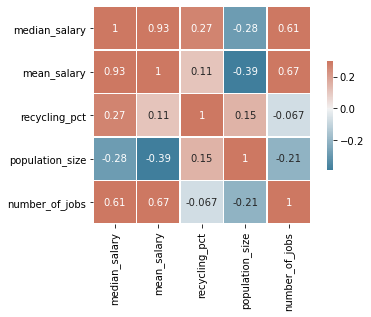

In [17]:
# We can plot a heatmap to see the correlation between the columns in the dataframe
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_year[['median_salary', 'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

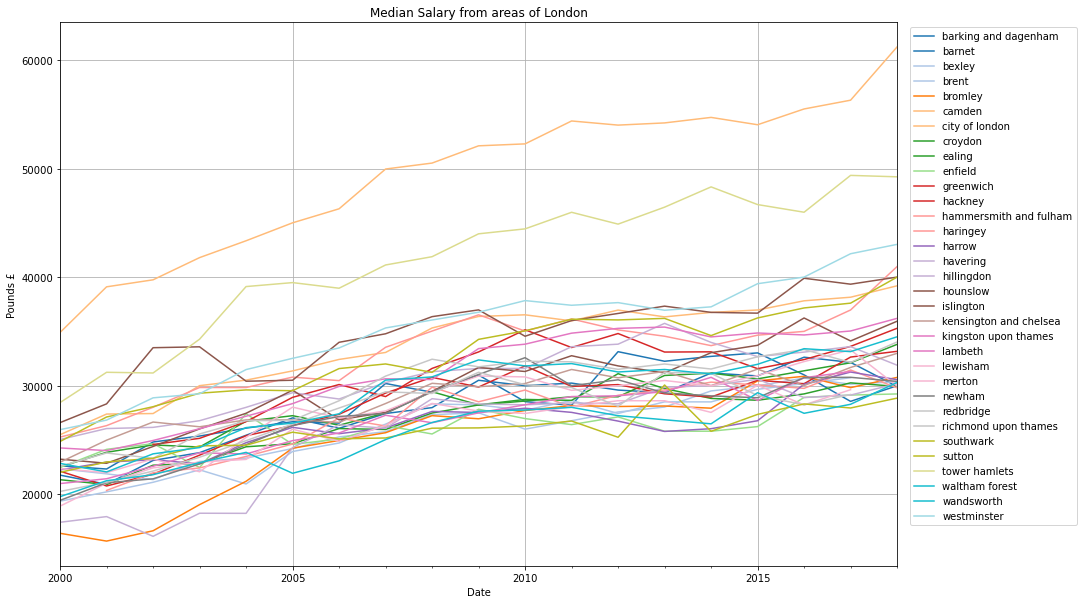

In [18]:
# Lets explore the median salary between the difference areas of London throughout the years
fig, ax = plt.subplots(1, 1, figsize=(15,10))

number_of_plots = len(df_year.area.unique())
colormap = plt.cm.tab20
colors = [colormap(1.*i/number_of_plots) for i in range(number_of_plots)]
ax.set_prop_cycle('color', colors)


df_year.groupby('area')['median_salary'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1))
ax.set_ylabel('Pounds £')
ax.set_xlabel('Date')
plt.title('Median Salary from areas of London')
ax.grid()

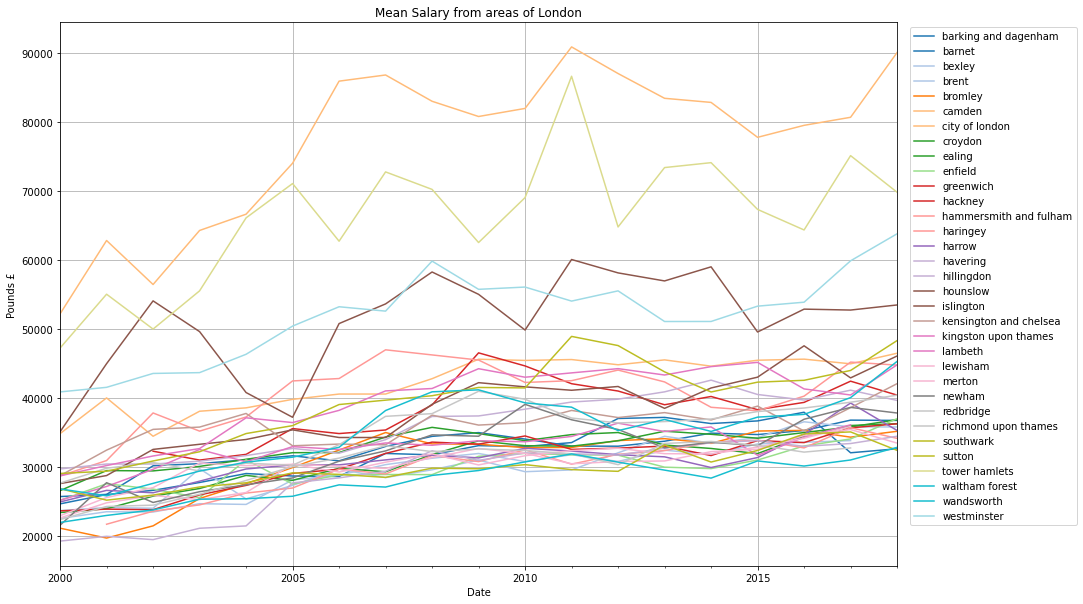

In [19]:
# And the mean salary for the different areas 
fig, ax = plt.subplots(1, 1, figsize=(15,10))

number_of_plots = len(df_year.area.unique())
colormap = plt.cm.tab20
colors = [colormap(1.*i/number_of_plots) for i in range(number_of_plots)]
ax.set_prop_cycle('color', colors)


df_year.groupby('area')['mean_salary'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1))
ax.set_ylabel('Pounds £')
ax.set_xlabel('Date')
plt.title('Mean Salary from areas of London')
ax.grid()

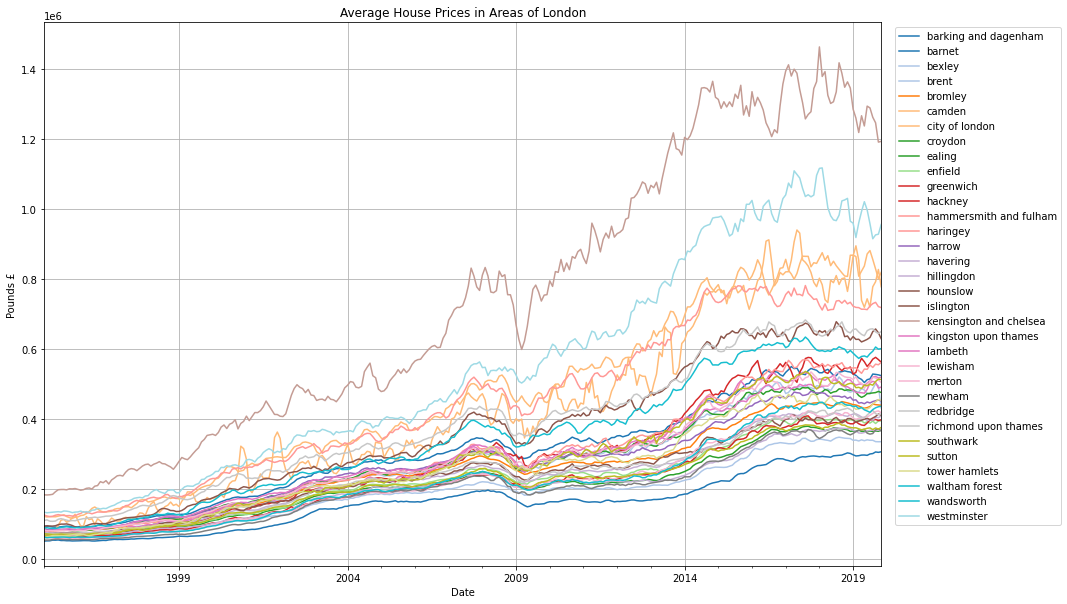

In [20]:
# Lets explore the average price of houses sold in the different areas
fig, ax = plt.subplots(1,1, figsize=(15,10))

number_of_plots = len(df_month.area.unique())
colormap = plt.cm.tab20
colors = [colormap(1.*i/number_of_plots) for i in range(number_of_plots)]
ax.set_prop_cycle('color', colors)

df_month.groupby('area')['average_price'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average House Prices in Areas of London')
ax.set_xlabel('Date')
ax.set_ylabel('Pounds £')
ax.grid()


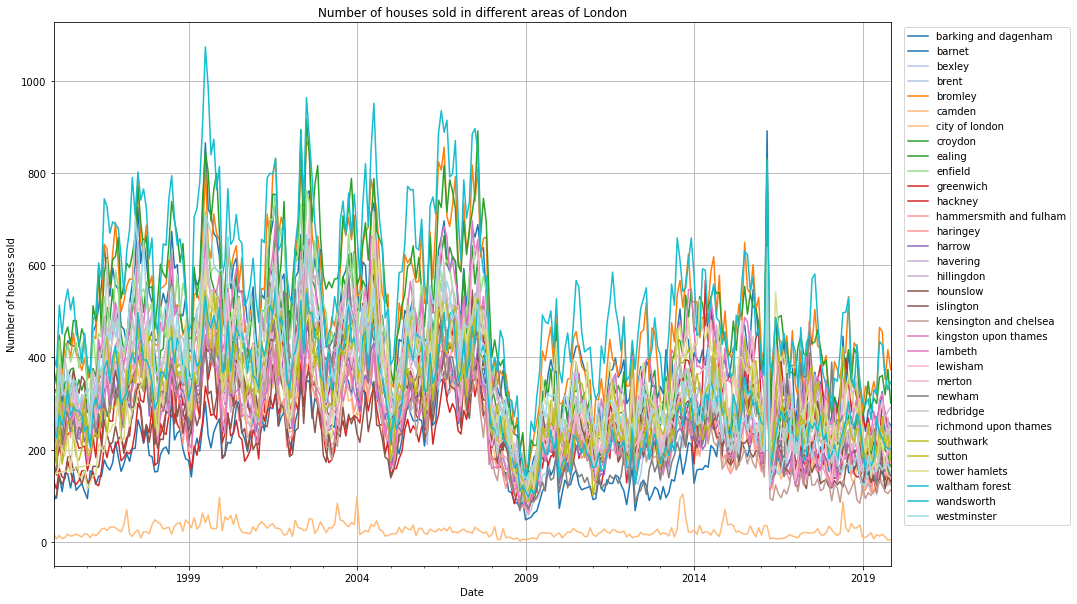

In [21]:
# There is a clear upwards trend of house prices with differing rates of increase between areas. 
# Lets investigate how the number of houses sold have evolved
fig, ax = plt.subplots(1,1, figsize=(15,10))

number_of_plots = len(df_month.area.unique())
colormap = plt.cm.tab20
colors = [colormap(1.*i/number_of_plots) for i in range(number_of_plots)]
ax.set_prop_cycle('color', colors)

df_month.groupby('area')['houses_sold'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Number of houses sold in different areas of London')
ax.set_xlabel('Date')
ax.set_ylabel('Number of houses sold')
ax.grid()


In [22]:
# Fluctuations are evident however there is a massive dip in sale numbers during the 2007-2009 period, coinciding with 
# the Great Recession

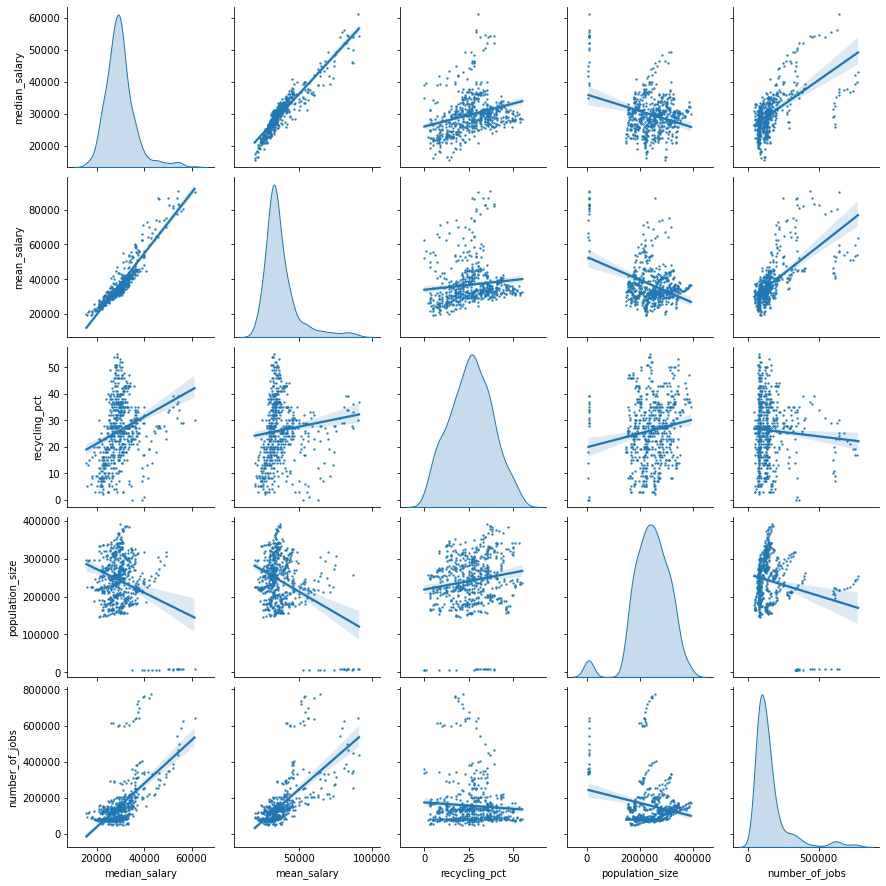

In [23]:
sns.pairplot(df_year, kind='reg', diag_kind='kde', plot_kws=dict(scatter_kws=dict(s=2)))
plt.show()